In [105]:
import pathlib

import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [106]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")


In [107]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 

In [108]:
# na_values will convert the '?' in original table to NaN
raw_data = pd.read_csv(dataset_path, names=column_names,
                      comment='\t', na_values = '?',
                      sep=" ", skipinitialspace=True)

In [109]:
raw_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [110]:
raw_data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [111]:
raw_data = raw_data.dropna()

In [112]:
raw_data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [113]:
origin = raw_data.pop('Origin')

In [114]:
raw_data['USA'] = (origin == 1)*1.0
raw_data['Europe'] = (origin == 2)*1.0
raw_data['Japan'] = (origin == 3)*1.0

In [115]:
raw_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


In [116]:
# random_state : int or numpy.random.RandomState, optional
# Seed for the random number generator (if int), or numpy RandomState object.
train_dataset = raw_data.sample(frac=0.8,random_state=0)
test_dataset = raw_data.drop(train_dataset.index)

In [117]:
train_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,28.0,4,90.0,75.0,2125.0,14.5,74,1.0,0.0,0.0
282,22.3,4,140.0,88.0,2890.0,17.3,79,1.0,0.0,0.0
69,12.0,8,350.0,160.0,4456.0,13.5,72,1.0,0.0,0.0
378,38.0,4,105.0,63.0,2125.0,14.7,82,1.0,0.0,0.0
331,33.8,4,97.0,67.0,2145.0,18.0,80,0.0,0.0,1.0


In [118]:
test_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
9,15.0,8,390.0,190.0,3850.0,8.5,70,1.0,0.0,0.0
25,10.0,8,360.0,215.0,4615.0,14.0,70,1.0,0.0,0.0
28,9.0,8,304.0,193.0,4732.0,18.5,70,1.0,0.0,0.0
31,25.0,4,113.0,95.0,2228.0,14.0,71,0.0,0.0,1.0
33,19.0,6,232.0,100.0,2634.0,13.0,71,1.0,0.0,0.0


In [119]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.624204,0.178344,0.197452
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.485101,0.383413,0.398712
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [120]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [121]:
train_stats['mean']

Cylinders          5.477707
Displacement     195.318471
Horsepower       104.869427
Weight          2990.251592
Acceleration      15.559236
Model Year        75.898089
USA                0.624204
Europe             0.178344
Japan              0.197452
Name: mean, dtype: float64

In [122]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [123]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [125]:
normed_train_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,0.774676,-0.465148,-0.495225
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,0.774676,-0.465148,-0.495225
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,0.774676,-0.465148,-0.495225
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,0.774676,-0.465148,-0.495225
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-1.286751,-0.465148,2.012852


In [132]:
len(normed_train_data.columns)

9

In [157]:
model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(normed_train_data.columns)]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

optimizer = tf.train.AdamOptimizer(0.0001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [158]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [159]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

In [160]:
history = model.fit(normed_train_data, 
          train_labels, 
          epochs=1000, batch_size=32,callbacks=[early_stop],verbose=1,
          validation_data=(normed_test_data, test_labels))

Train on 314 samples, validate on 78 samples
Epoch 1/1000
314/314 [==============================] - 0s 892us/step - loss: 609.8816 - mean_absolute_error: 23.4607 - mean_squared_error: 609.8816 - val_loss: 646.0399 - val_mean_absolute_error: 24.0988 - val_mean_squared_error: 646.0399
Epoch 2/1000
314/314 [==============================] - 0s 115us/step - loss: 606.3705 - mean_absolute_error: 23.3824 - mean_squared_error: 606.3705 - val_loss: 642.3960 - val_mean_absolute_error: 24.0204 - val_mean_squared_error: 642.3960
Epoch 3/1000
314/314 [==============================] - 0s 106us/step - loss: 602.8732 - mean_absolute_error: 23.3048 - mean_squared_error: 602.8732 - val_loss: 638.7607 - val_mean_absolute_error: 23.9411 - val_mean_squared_error: 638.7607
Epoch 4/1000
314/314 [==============================] - 0s 109us/step - loss: 599.3794 - mean_absolute_error: 23.2256 - mean_squared_error: 599.3794 - val_loss: 635.1123 - val_mean_absolute_error: 23.8615 - val_mean_squared_error: 635.

Epoch 35/1000
314/314 [==============================] - 0s 127us/step - loss: 436.9973 - mean_absolute_error: 19.2592 - mean_squared_error: 436.9973 - val_loss: 463.9160 - val_mean_absolute_error: 19.8232 - val_mean_squared_error: 463.9160
Epoch 36/1000
314/314 [==============================] - 0s 103us/step - loss: 429.1538 - mean_absolute_error: 19.0527 - mean_squared_error: 429.1538 - val_loss: 455.4518 - val_mean_absolute_error: 19.6104 - val_mean_squared_error: 455.4518
Epoch 37/1000
314/314 [==============================] - 0s 96us/step - loss: 421.0938 - mean_absolute_error: 18.8391 - mean_squared_error: 421.0938 - val_loss: 446.8099 - val_mean_absolute_error: 19.3924 - val_mean_squared_error: 446.8099
Epoch 38/1000
314/314 [==============================] - 0s 103us/step - loss: 412.8760 - mean_absolute_error: 18.6179 - mean_squared_error: 412.8760 - val_loss: 438.0413 - val_mean_absolute_error: 19.1687 - val_mean_squared_error: 438.0413
Epoch 39/1000
314/314 [==============

314/314 [==============================] - 0s 93us/step - loss: 140.6908 - mean_absolute_error: 10.1600 - mean_squared_error: 140.6908 - val_loss: 141.9865 - val_mean_absolute_error: 10.5312 - val_mean_squared_error: 141.9865
Epoch 70/1000
314/314 [==============================] - 0s 103us/step - loss: 133.6588 - mean_absolute_error: 9.8771 - mean_squared_error: 133.6588 - val_loss: 134.3214 - val_mean_absolute_error: 10.2380 - val_mean_squared_error: 134.3214
Epoch 71/1000
314/314 [==============================] - 0s 96us/step - loss: 126.9035 - mean_absolute_error: 9.5899 - mean_squared_error: 126.9035 - val_loss: 127.0097 - val_mean_absolute_error: 9.9515 - val_mean_squared_error: 127.0097
Epoch 72/1000
314/314 [==============================] - 0s 99us/step - loss: 120.4467 - mean_absolute_error: 9.3181 - mean_squared_error: 120.4467 - val_loss: 119.9844 - val_mean_absolute_error: 9.6688 - val_mean_squared_error: 119.9844
Epoch 73/1000
314/314 [==============================] - 0

Epoch 104/1000
314/314 [==============================] - 0s 99us/step - loss: 29.0158 - mean_absolute_error: 4.2783 - mean_squared_error: 29.0158 - val_loss: 22.3008 - val_mean_absolute_error: 3.9250 - val_mean_squared_error: 22.3008
Epoch 105/1000
314/314 [==============================] - 0s 90us/step - loss: 28.2883 - mean_absolute_error: 4.2159 - mean_squared_error: 28.2883 - val_loss: 21.6608 - val_mean_absolute_error: 3.8580 - val_mean_squared_error: 21.6608
Epoch 106/1000
314/314 [==============================] - 0s 96us/step - loss: 27.5891 - mean_absolute_error: 4.1559 - mean_squared_error: 27.5891 - val_loss: 21.0818 - val_mean_absolute_error: 3.7972 - val_mean_squared_error: 21.0818
Epoch 107/1000
314/314 [==============================] - 0s 96us/step - loss: 26.9717 - mean_absolute_error: 4.0996 - mean_squared_error: 26.9717 - val_loss: 20.5260 - val_mean_absolute_error: 3.7351 - val_mean_squared_error: 20.5260
Epoch 108/1000
314/314 [==============================] - 0s

Epoch 139/1000
314/314 [==============================] - 0s 93us/step - loss: 17.3560 - mean_absolute_error: 3.2255 - mean_squared_error: 17.3560 - val_loss: 13.6148 - val_mean_absolute_error: 2.9383 - val_mean_squared_error: 13.6148
Epoch 140/1000
314/314 [==============================] - 0s 96us/step - loss: 17.2198 - mean_absolute_error: 3.2106 - mean_squared_error: 17.2198 - val_loss: 13.5186 - val_mean_absolute_error: 2.9253 - val_mean_squared_error: 13.5186
Epoch 141/1000
314/314 [==============================] - 0s 99us/step - loss: 17.0767 - mean_absolute_error: 3.1958 - mean_squared_error: 17.0767 - val_loss: 13.4295 - val_mean_absolute_error: 2.9120 - val_mean_squared_error: 13.4295
Epoch 142/1000
314/314 [==============================] - 0s 103us/step - loss: 16.9404 - mean_absolute_error: 3.1822 - mean_squared_error: 16.9404 - val_loss: 13.3417 - val_mean_absolute_error: 2.9002 - val_mean_squared_error: 13.3417
Epoch 143/1000
314/314 [==============================] - 0

Epoch 174/1000
314/314 [==============================] - 0s 96us/step - loss: 13.9204 - mean_absolute_error: 2.8502 - mean_squared_error: 13.9204 - val_loss: 11.3852 - val_mean_absolute_error: 2.6150 - val_mean_squared_error: 11.3852
Epoch 175/1000
314/314 [==============================] - 0s 99us/step - loss: 13.8473 - mean_absolute_error: 2.8424 - mean_squared_error: 13.8473 - val_loss: 11.3444 - val_mean_absolute_error: 2.6098 - val_mean_squared_error: 11.3444
Epoch 176/1000
314/314 [==============================] - 0s 90us/step - loss: 13.7762 - mean_absolute_error: 2.8335 - mean_squared_error: 13.7762 - val_loss: 11.3007 - val_mean_absolute_error: 2.6009 - val_mean_squared_error: 11.3007
Epoch 177/1000
314/314 [==============================] - 0s 93us/step - loss: 13.7113 - mean_absolute_error: 2.8242 - mean_squared_error: 13.7113 - val_loss: 11.2333 - val_mean_absolute_error: 2.5915 - val_mean_squared_error: 11.2333
Epoch 178/1000
314/314 [==============================] - 0s

Epoch 209/1000
314/314 [==============================] - 0s 99us/step - loss: 11.8959 - mean_absolute_error: 2.5886 - mean_squared_error: 11.8959 - val_loss: 9.9640 - val_mean_absolute_error: 2.3693 - val_mean_squared_error: 9.9640
Epoch 210/1000
314/314 [==============================] - 0s 93us/step - loss: 11.8568 - mean_absolute_error: 2.5823 - mean_squared_error: 11.8568 - val_loss: 9.9411 - val_mean_absolute_error: 2.3655 - val_mean_squared_error: 9.9411
Epoch 211/1000
314/314 [==============================] - 0s 96us/step - loss: 11.8034 - mean_absolute_error: 2.5759 - mean_squared_error: 11.8034 - val_loss: 9.9021 - val_mean_absolute_error: 2.3585 - val_mean_squared_error: 9.9021
Epoch 212/1000
314/314 [==============================] - 0s 93us/step - loss: 11.7594 - mean_absolute_error: 2.5698 - mean_squared_error: 11.7594 - val_loss: 9.8697 - val_mean_absolute_error: 2.3532 - val_mean_squared_error: 9.8697
Epoch 213/1000
314/314 [==============================] - 0s 96us/st

314/314 [==============================] - 0s 93us/step - loss: 10.5471 - mean_absolute_error: 2.4026 - mean_squared_error: 10.5471 - val_loss: 9.0018 - val_mean_absolute_error: 2.2189 - val_mean_squared_error: 9.0018
Epoch 245/1000
314/314 [==============================] - 0s 99us/step - loss: 10.5166 - mean_absolute_error: 2.3976 - mean_squared_error: 10.5166 - val_loss: 8.9686 - val_mean_absolute_error: 2.2142 - val_mean_squared_error: 8.9686
Epoch 246/1000
314/314 [==============================] - 0s 99us/step - loss: 10.4833 - mean_absolute_error: 2.3935 - mean_squared_error: 10.4833 - val_loss: 8.9447 - val_mean_absolute_error: 2.2112 - val_mean_squared_error: 8.9447
Epoch 247/1000
314/314 [==============================] - 0s 99us/step - loss: 10.4580 - mean_absolute_error: 2.3898 - mean_squared_error: 10.4580 - val_loss: 8.9266 - val_mean_absolute_error: 2.2078 - val_mean_squared_error: 8.9266
Epoch 248/1000
314/314 [==============================] - 0s 103us/step - loss: 10.

314/314 [==============================] - 0s 96us/step - loss: 9.5969 - mean_absolute_error: 2.2602 - mean_squared_error: 9.5969 - val_loss: 8.3440 - val_mean_absolute_error: 2.1253 - val_mean_squared_error: 8.3440
Epoch 280/1000
314/314 [==============================] - 0s 106us/step - loss: 9.5710 - mean_absolute_error: 2.2564 - mean_squared_error: 9.5710 - val_loss: 8.3269 - val_mean_absolute_error: 2.1209 - val_mean_squared_error: 8.3269
Epoch 281/1000
314/314 [==============================] - 0s 106us/step - loss: 9.5491 - mean_absolute_error: 2.2526 - mean_squared_error: 9.5491 - val_loss: 8.3148 - val_mean_absolute_error: 2.1201 - val_mean_squared_error: 8.3148
Epoch 282/1000
314/314 [==============================] - 0s 112us/step - loss: 9.5259 - mean_absolute_error: 2.2489 - mean_squared_error: 9.5259 - val_loss: 8.2968 - val_mean_absolute_error: 2.1177 - val_mean_squared_error: 8.2968
Epoch 283/1000
314/314 [==============================] - 0s 115us/step - loss: 9.5031 -

314/314 [==============================] - 0s 103us/step - loss: 8.9006 - mean_absolute_error: 2.1530 - mean_squared_error: 8.9006 - val_loss: 7.8509 - val_mean_absolute_error: 2.0887 - val_mean_squared_error: 7.8509
Epoch 315/1000
314/314 [==============================] - 0s 93us/step - loss: 8.8895 - mean_absolute_error: 2.1510 - mean_squared_error: 8.8895 - val_loss: 7.8536 - val_mean_absolute_error: 2.0886 - val_mean_squared_error: 7.8536
Epoch 316/1000
314/314 [==============================] - 0s 93us/step - loss: 8.8648 - mean_absolute_error: 2.1476 - mean_squared_error: 8.8648 - val_loss: 7.8402 - val_mean_absolute_error: 2.0860 - val_mean_squared_error: 7.8402
Epoch 317/1000
314/314 [==============================] - 0s 99us/step - loss: 8.8489 - mean_absolute_error: 2.1448 - mean_squared_error: 8.8489 - val_loss: 7.8228 - val_mean_absolute_error: 2.0853 - val_mean_squared_error: 7.8228
Epoch 318/1000
314/314 [==============================] - 0s 93us/step - loss: 8.8389 - me

314/314 [==============================] - 0s 99us/step - loss: 8.3938 - mean_absolute_error: 2.0765 - mean_squared_error: 8.3938 - val_loss: 7.4569 - val_mean_absolute_error: 2.0548 - val_mean_squared_error: 7.4569
Epoch 350/1000
314/314 [==============================] - 0s 103us/step - loss: 8.3828 - mean_absolute_error: 2.0745 - mean_squared_error: 8.3828 - val_loss: 7.4735 - val_mean_absolute_error: 2.0561 - val_mean_squared_error: 7.4735
Epoch 351/1000
314/314 [==============================] - 0s 96us/step - loss: 8.3637 - mean_absolute_error: 2.0719 - mean_squared_error: 8.3637 - val_loss: 7.4560 - val_mean_absolute_error: 2.0541 - val_mean_squared_error: 7.4560
Epoch 352/1000
314/314 [==============================] - 0s 97us/step - loss: 8.3546 - mean_absolute_error: 2.0708 - mean_squared_error: 8.3546 - val_loss: 7.4479 - val_mean_absolute_error: 2.0514 - val_mean_squared_error: 7.4479
Epoch 353/1000
314/314 [==============================] - 0s 96us/step - loss: 8.3415 - me

314/314 [==============================] - 0s 99us/step - loss: 7.9966 - mean_absolute_error: 2.0200 - mean_squared_error: 7.9966 - val_loss: 7.1919 - val_mean_absolute_error: 2.0265 - val_mean_squared_error: 7.1919
Epoch 385/1000
314/314 [==============================] - 0s 93us/step - loss: 7.9840 - mean_absolute_error: 2.0178 - mean_squared_error: 7.9840 - val_loss: 7.1832 - val_mean_absolute_error: 2.0267 - val_mean_squared_error: 7.1832
Epoch 386/1000
314/314 [==============================] - 0s 99us/step - loss: 7.9751 - mean_absolute_error: 2.0167 - mean_squared_error: 7.9751 - val_loss: 7.1642 - val_mean_absolute_error: 2.0243 - val_mean_squared_error: 7.1642
Epoch 387/1000
314/314 [==============================] - 0s 96us/step - loss: 7.9632 - mean_absolute_error: 2.0148 - mean_squared_error: 7.9632 - val_loss: 7.1605 - val_mean_absolute_error: 2.0222 - val_mean_squared_error: 7.1605
Epoch 388/1000
314/314 [==============================] - 0s 99us/step - loss: 7.9570 - mea

314/314 [==============================] - 0s 96us/step - loss: 7.6729 - mean_absolute_error: 1.9728 - mean_squared_error: 7.6729 - val_loss: 6.9605 - val_mean_absolute_error: 1.9952 - val_mean_squared_error: 6.9605
Epoch 420/1000
314/314 [==============================] - 0s 99us/step - loss: 7.6591 - mean_absolute_error: 1.9715 - mean_squared_error: 7.6591 - val_loss: 6.9332 - val_mean_absolute_error: 1.9914 - val_mean_squared_error: 6.9332
Epoch 421/1000
314/314 [==============================] - 0s 99us/step - loss: 7.6499 - mean_absolute_error: 1.9699 - mean_squared_error: 7.6499 - val_loss: 6.9328 - val_mean_absolute_error: 1.9885 - val_mean_squared_error: 6.9328
Epoch 422/1000
314/314 [==============================] - 0s 93us/step - loss: 7.6524 - mean_absolute_error: 1.9707 - mean_squared_error: 7.6524 - val_loss: 6.9352 - val_mean_absolute_error: 1.9922 - val_mean_squared_error: 6.9352
Epoch 423/1000
314/314 [==============================] - 0s 96us/step - loss: 7.6330 - mea

314/314 [==============================] - 0s 96us/step - loss: 7.4058 - mean_absolute_error: 1.9345 - mean_squared_error: 7.4058 - val_loss: 6.7498 - val_mean_absolute_error: 1.9614 - val_mean_squared_error: 6.7498
Epoch 455/1000
314/314 [==============================] - 0s 99us/step - loss: 7.3936 - mean_absolute_error: 1.9333 - mean_squared_error: 7.3936 - val_loss: 6.7491 - val_mean_absolute_error: 1.9611 - val_mean_squared_error: 6.7491
Epoch 456/1000
314/314 [==============================] - 0s 93us/step - loss: 7.3881 - mean_absolute_error: 1.9323 - mean_squared_error: 7.3881 - val_loss: 6.7305 - val_mean_absolute_error: 1.9585 - val_mean_squared_error: 6.7305
Epoch 457/1000
314/314 [==============================] - 0s 99us/step - loss: 7.3806 - mean_absolute_error: 1.9310 - mean_squared_error: 7.3806 - val_loss: 6.7169 - val_mean_absolute_error: 1.9574 - val_mean_squared_error: 6.7169
Epoch 458/1000
314/314 [==============================] - 0s 99us/step - loss: 7.3765 - mea

314/314 [==============================] - 0s 103us/step - loss: 7.1721 - mean_absolute_error: 1.8997 - mean_squared_error: 7.1721 - val_loss: 6.5687 - val_mean_absolute_error: 1.9294 - val_mean_squared_error: 6.5687
Epoch 490/1000
314/314 [==============================] - 0s 103us/step - loss: 7.1653 - mean_absolute_error: 1.8980 - mean_squared_error: 7.1653 - val_loss: 6.5751 - val_mean_absolute_error: 1.9337 - val_mean_squared_error: 6.5751
Epoch 491/1000
314/314 [==============================] - 0s 93us/step - loss: 7.1615 - mean_absolute_error: 1.8980 - mean_squared_error: 7.1615 - val_loss: 6.5575 - val_mean_absolute_error: 1.9290 - val_mean_squared_error: 6.5575
Epoch 492/1000
314/314 [==============================] - 0s 96us/step - loss: 7.1516 - mean_absolute_error: 1.8963 - mean_squared_error: 7.1516 - val_loss: 6.5640 - val_mean_absolute_error: 1.9317 - val_mean_squared_error: 6.5640
Epoch 493/1000
314/314 [==============================] - 0s 99us/step - loss: 7.1470 - m

314/314 [==============================] - 0s 103us/step - loss: 6.9753 - mean_absolute_error: 1.8690 - mean_squared_error: 6.9753 - val_loss: 6.4616 - val_mean_absolute_error: 1.9150 - val_mean_squared_error: 6.4616
Epoch 525/1000
314/314 [==============================] - 0s 103us/step - loss: 6.9687 - mean_absolute_error: 1.8669 - mean_squared_error: 6.9687 - val_loss: 6.4476 - val_mean_absolute_error: 1.9134 - val_mean_squared_error: 6.4476
Epoch 526/1000
314/314 [==============================] - 0s 103us/step - loss: 6.9713 - mean_absolute_error: 1.8684 - mean_squared_error: 6.9713 - val_loss: 6.4777 - val_mean_absolute_error: 1.9186 - val_mean_squared_error: 6.4777
Epoch 527/1000
314/314 [==============================] - 0s 99us/step - loss: 6.9658 - mean_absolute_error: 1.8693 - mean_squared_error: 6.9658 - val_loss: 6.4532 - val_mean_absolute_error: 1.9183 - val_mean_squared_error: 6.4532
Epoch 528/1000
314/314 [==============================] - 0s 99us/step - loss: 6.9625 - 

314/314 [==============================] - 0s 99us/step - loss: 6.8048 - mean_absolute_error: 1.8411 - mean_squared_error: 6.8048 - val_loss: 6.3711 - val_mean_absolute_error: 1.9043 - val_mean_squared_error: 6.3711
Epoch 560/1000
314/314 [==============================] - 0s 109us/step - loss: 6.8067 - mean_absolute_error: 1.8416 - mean_squared_error: 6.8067 - val_loss: 6.3683 - val_mean_absolute_error: 1.9059 - val_mean_squared_error: 6.3683
Epoch 561/1000
314/314 [==============================] - 0s 96us/step - loss: 6.8004 - mean_absolute_error: 1.8410 - mean_squared_error: 6.8004 - val_loss: 6.3749 - val_mean_absolute_error: 1.9105 - val_mean_squared_error: 6.3749
Epoch 562/1000
314/314 [==============================] - 0s 99us/step - loss: 6.7926 - mean_absolute_error: 1.8401 - mean_squared_error: 6.7926 - val_loss: 6.3814 - val_mean_absolute_error: 1.9092 - val_mean_squared_error: 6.3814
Epoch 563/1000
314/314 [==============================] - 0s 96us/step - loss: 6.7922 - me

314/314 [==============================] - 0s 96us/step - loss: 6.6591 - mean_absolute_error: 1.8176 - mean_squared_error: 6.6591 - val_loss: 6.2727 - val_mean_absolute_error: 1.8936 - val_mean_squared_error: 6.2727
Epoch 595/1000
314/314 [==============================] - 0s 96us/step - loss: 6.6535 - mean_absolute_error: 1.8166 - mean_squared_error: 6.6535 - val_loss: 6.2804 - val_mean_absolute_error: 1.8968 - val_mean_squared_error: 6.2804
Epoch 596/1000
314/314 [==============================] - 0s 96us/step - loss: 6.6528 - mean_absolute_error: 1.8164 - mean_squared_error: 6.6528 - val_loss: 6.2686 - val_mean_absolute_error: 1.8929 - val_mean_squared_error: 6.2686
Epoch 597/1000
314/314 [==============================] - 0s 96us/step - loss: 6.6466 - mean_absolute_error: 1.8149 - mean_squared_error: 6.6466 - val_loss: 6.2594 - val_mean_absolute_error: 1.8936 - val_mean_squared_error: 6.2594
Epoch 598/1000
314/314 [==============================] - 0s 103us/step - loss: 6.6492 - me

314/314 [==============================] - 0s 99us/step - loss: 6.5289 - mean_absolute_error: 1.7981 - mean_squared_error: 6.5289 - val_loss: 6.1765 - val_mean_absolute_error: 1.8852 - val_mean_squared_error: 6.1765
Epoch 630/1000
314/314 [==============================] - 0s 96us/step - loss: 6.5206 - mean_absolute_error: 1.7967 - mean_squared_error: 6.5206 - val_loss: 6.1775 - val_mean_absolute_error: 1.8838 - val_mean_squared_error: 6.1775
Epoch 631/1000
314/314 [==============================] - 0s 103us/step - loss: 6.5164 - mean_absolute_error: 1.7962 - mean_squared_error: 6.5164 - val_loss: 6.1750 - val_mean_absolute_error: 1.8848 - val_mean_squared_error: 6.1750
Epoch 632/1000
314/314 [==============================] - 0s 96us/step - loss: 6.5119 - mean_absolute_error: 1.7952 - mean_squared_error: 6.5119 - val_loss: 6.1649 - val_mean_absolute_error: 1.8821 - val_mean_squared_error: 6.1649
Epoch 633/1000
314/314 [==============================] - 0s 96us/step - loss: 6.5124 - me

314/314 [==============================] - 0s 99us/step - loss: 6.4101 - mean_absolute_error: 1.7812 - mean_squared_error: 6.4101 - val_loss: 6.0744 - val_mean_absolute_error: 1.8730 - val_mean_squared_error: 6.0744
Epoch 665/1000
314/314 [==============================] - 0s 99us/step - loss: 6.4001 - mean_absolute_error: 1.7798 - mean_squared_error: 6.4001 - val_loss: 6.0791 - val_mean_absolute_error: 1.8740 - val_mean_squared_error: 6.0791
Epoch 666/1000
314/314 [==============================] - 0s 90us/step - loss: 6.3954 - mean_absolute_error: 1.7788 - mean_squared_error: 6.3954 - val_loss: 6.0821 - val_mean_absolute_error: 1.8738 - val_mean_squared_error: 6.0821
Epoch 667/1000
314/314 [==============================] - 0s 96us/step - loss: 6.4034 - mean_absolute_error: 1.7808 - mean_squared_error: 6.4034 - val_loss: 6.1167 - val_mean_absolute_error: 1.8812 - val_mean_squared_error: 6.1167
Epoch 668/1000
314/314 [==============================] - 0s 96us/step - loss: 6.3973 - mea

314/314 [==============================] - 0s 99us/step - loss: 6.2901 - mean_absolute_error: 1.7626 - mean_squared_error: 6.2901 - val_loss: 6.0180 - val_mean_absolute_error: 1.8657 - val_mean_squared_error: 6.0180
Epoch 700/1000
314/314 [==============================] - 0s 99us/step - loss: 6.2877 - mean_absolute_error: 1.7619 - mean_squared_error: 6.2877 - val_loss: 5.9970 - val_mean_absolute_error: 1.8599 - val_mean_squared_error: 5.9970
Epoch 701/1000
314/314 [==============================] - 0s 96us/step - loss: 6.2809 - mean_absolute_error: 1.7609 - mean_squared_error: 6.2809 - val_loss: 6.0173 - val_mean_absolute_error: 1.8647 - val_mean_squared_error: 6.0173
Epoch 702/1000
314/314 [==============================] - 0s 96us/step - loss: 6.2924 - mean_absolute_error: 1.7646 - mean_squared_error: 6.2924 - val_loss: 6.0493 - val_mean_absolute_error: 1.8759 - val_mean_squared_error: 6.0493
Epoch 703/1000
314/314 [==============================] - 0s 96us/step - loss: 6.2800 - mea

314/314 [==============================] - 0s 99us/step - loss: 6.1825 - mean_absolute_error: 1.7450 - mean_squared_error: 6.1825 - val_loss: 5.9383 - val_mean_absolute_error: 1.8579 - val_mean_squared_error: 5.9383
Epoch 735/1000
314/314 [==============================] - 0s 96us/step - loss: 6.1883 - mean_absolute_error: 1.7467 - mean_squared_error: 6.1883 - val_loss: 5.9767 - val_mean_absolute_error: 1.8664 - val_mean_squared_error: 5.9767
Epoch 736/1000
314/314 [==============================] - 0s 99us/step - loss: 6.1733 - mean_absolute_error: 1.7441 - mean_squared_error: 6.1733 - val_loss: 5.9345 - val_mean_absolute_error: 1.8582 - val_mean_squared_error: 5.9345
Epoch 737/1000
314/314 [==============================] - 0s 103us/step - loss: 6.1731 - mean_absolute_error: 1.7441 - mean_squared_error: 6.1731 - val_loss: 5.9402 - val_mean_absolute_error: 1.8585 - val_mean_squared_error: 5.9402
Epoch 738/1000
314/314 [==============================] - 0s 96us/step - loss: 6.1678 - me

314/314 [==============================] - 0s 90us/step - loss: 6.0825 - mean_absolute_error: 1.7285 - mean_squared_error: 6.0825 - val_loss: 5.8810 - val_mean_absolute_error: 1.8506 - val_mean_squared_error: 5.8810
Epoch 770/1000
314/314 [==============================] - 0s 99us/step - loss: 6.0871 - mean_absolute_error: 1.7290 - mean_squared_error: 6.0871 - val_loss: 5.8644 - val_mean_absolute_error: 1.8462 - val_mean_squared_error: 5.8644
Epoch 771/1000
314/314 [==============================] - 0s 96us/step - loss: 6.0817 - mean_absolute_error: 1.7285 - mean_squared_error: 6.0817 - val_loss: 5.8934 - val_mean_absolute_error: 1.8540 - val_mean_squared_error: 5.8934
Epoch 772/1000
314/314 [==============================] - 0s 93us/step - loss: 6.0768 - mean_absolute_error: 1.7283 - mean_squared_error: 6.0768 - val_loss: 5.8893 - val_mean_absolute_error: 1.8535 - val_mean_squared_error: 5.8893
Epoch 773/1000
314/314 [==============================] - 0s 96us/step - loss: 6.0787 - mea

314/314 [==============================] - 0s 99us/step - loss: 6.0050 - mean_absolute_error: 1.7143 - mean_squared_error: 6.0050 - val_loss: 5.8064 - val_mean_absolute_error: 1.8394 - val_mean_squared_error: 5.8064
Epoch 805/1000
314/314 [==============================] - 0s 96us/step - loss: 5.9946 - mean_absolute_error: 1.7133 - mean_squared_error: 5.9946 - val_loss: 5.8232 - val_mean_absolute_error: 1.8440 - val_mean_squared_error: 5.8232
Epoch 806/1000
314/314 [==============================] - 0s 96us/step - loss: 5.9942 - mean_absolute_error: 1.7130 - mean_squared_error: 5.9942 - val_loss: 5.8349 - val_mean_absolute_error: 1.8478 - val_mean_squared_error: 5.8349
Epoch 807/1000
314/314 [==============================] - 0s 96us/step - loss: 5.9851 - mean_absolute_error: 1.7118 - mean_squared_error: 5.9851 - val_loss: 5.8323 - val_mean_absolute_error: 1.8454 - val_mean_squared_error: 5.8323
Epoch 808/1000
314/314 [==============================] - 0s 99us/step - loss: 5.9856 - mea

314/314 [==============================] - 0s 103us/step - loss: 5.9083 - mean_absolute_error: 1.6979 - mean_squared_error: 5.9083 - val_loss: 5.7580 - val_mean_absolute_error: 1.8353 - val_mean_squared_error: 5.7580
Epoch 840/1000
314/314 [==============================] - 0s 93us/step - loss: 5.9125 - mean_absolute_error: 1.6989 - mean_squared_error: 5.9125 - val_loss: 5.7670 - val_mean_absolute_error: 1.8377 - val_mean_squared_error: 5.7670
Epoch 841/1000
314/314 [==============================] - 0s 96us/step - loss: 5.9078 - mean_absolute_error: 1.6981 - mean_squared_error: 5.9078 - val_loss: 5.7834 - val_mean_absolute_error: 1.8410 - val_mean_squared_error: 5.7834
Epoch 842/1000
314/314 [==============================] - 0s 99us/step - loss: 5.9120 - mean_absolute_error: 1.6993 - mean_squared_error: 5.9120 - val_loss: 5.7588 - val_mean_absolute_error: 1.8356 - val_mean_squared_error: 5.7588
Epoch 843/1000
314/314 [==============================] - 0s 93us/step - loss: 5.9020 - me

314/314 [==============================] - 0s 93us/step - loss: 5.8377 - mean_absolute_error: 1.6861 - mean_squared_error: 5.8377 - val_loss: 5.7550 - val_mean_absolute_error: 1.8405 - val_mean_squared_error: 5.7550
Epoch 875/1000
314/314 [==============================] - 0s 99us/step - loss: 5.8515 - mean_absolute_error: 1.6877 - mean_squared_error: 5.8515 - val_loss: 5.6970 - val_mean_absolute_error: 1.8259 - val_mean_squared_error: 5.6970
Epoch 876/1000
314/314 [==============================] - 0s 90us/step - loss: 5.8478 - mean_absolute_error: 1.6848 - mean_squared_error: 5.8478 - val_loss: 5.7624 - val_mean_absolute_error: 1.8426 - val_mean_squared_error: 5.7624
Epoch 877/1000
314/314 [==============================] - 0s 96us/step - loss: 5.8357 - mean_absolute_error: 1.6851 - mean_squared_error: 5.8357 - val_loss: 5.7419 - val_mean_absolute_error: 1.8365 - val_mean_squared_error: 5.7419
Epoch 878/1000
314/314 [==============================] - 0s 99us/step - loss: 5.8251 - mea

314/314 [==============================] - 0s 103us/step - loss: 5.7638 - mean_absolute_error: 1.6719 - mean_squared_error: 5.7638 - val_loss: 5.6518 - val_mean_absolute_error: 1.8230 - val_mean_squared_error: 5.6518
Epoch 910/1000
314/314 [==============================] - 0s 99us/step - loss: 5.7578 - mean_absolute_error: 1.6710 - mean_squared_error: 5.7578 - val_loss: 5.6597 - val_mean_absolute_error: 1.8240 - val_mean_squared_error: 5.6597
Epoch 911/1000
314/314 [==============================] - 0s 96us/step - loss: 5.7596 - mean_absolute_error: 1.6714 - mean_squared_error: 5.7596 - val_loss: 5.6870 - val_mean_absolute_error: 1.8303 - val_mean_squared_error: 5.6870
Epoch 912/1000
314/314 [==============================] - 0s 96us/step - loss: 5.7500 - mean_absolute_error: 1.6696 - mean_squared_error: 5.7500 - val_loss: 5.7013 - val_mean_absolute_error: 1.8368 - val_mean_squared_error: 5.7013
Epoch 913/1000
314/314 [==============================] - 0s 99us/step - loss: 5.7549 - me

314/314 [==============================] - 0s 99us/step - loss: 5.6913 - mean_absolute_error: 1.6584 - mean_squared_error: 5.6913 - val_loss: 5.6221 - val_mean_absolute_error: 1.8215 - val_mean_squared_error: 5.6221
Epoch 945/1000
314/314 [==============================] - 0s 99us/step - loss: 5.6864 - mean_absolute_error: 1.6571 - mean_squared_error: 5.6864 - val_loss: 5.6308 - val_mean_absolute_error: 1.8239 - val_mean_squared_error: 5.6308
Epoch 946/1000
314/314 [==============================] - 0s 99us/step - loss: 5.6884 - mean_absolute_error: 1.6583 - mean_squared_error: 5.6884 - val_loss: 5.6553 - val_mean_absolute_error: 1.8293 - val_mean_squared_error: 5.6553
Epoch 947/1000
314/314 [==============================] - 0s 93us/step - loss: 5.6865 - mean_absolute_error: 1.6578 - mean_squared_error: 5.6865 - val_loss: 5.6472 - val_mean_absolute_error: 1.8293 - val_mean_squared_error: 5.6472
Epoch 948/1000
314/314 [==============================] - 0s 97us/step - loss: 5.6876 - mea

314/314 [==============================] - 0s 93us/step - loss: 5.6277 - mean_absolute_error: 1.6467 - mean_squared_error: 5.6277 - val_loss: 5.5495 - val_mean_absolute_error: 1.8107 - val_mean_squared_error: 5.5495
Epoch 980/1000
314/314 [==============================] - 0s 99us/step - loss: 5.6166 - mean_absolute_error: 1.6450 - mean_squared_error: 5.6166 - val_loss: 5.5585 - val_mean_absolute_error: 1.8121 - val_mean_squared_error: 5.5585
Epoch 981/1000
314/314 [==============================] - 0s 103us/step - loss: 5.6128 - mean_absolute_error: 1.6445 - mean_squared_error: 5.6128 - val_loss: 5.5716 - val_mean_absolute_error: 1.8160 - val_mean_squared_error: 5.5716
Epoch 982/1000
314/314 [==============================] - 0s 96us/step - loss: 5.6159 - mean_absolute_error: 1.6449 - mean_squared_error: 5.6159 - val_loss: 5.5926 - val_mean_absolute_error: 1.8215 - val_mean_squared_error: 5.5926
Epoch 983/1000
314/314 [==============================] - 0s 96us/step - loss: 5.6162 - me

In [162]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
995,5.580881,1.817628,5.580881,5.588131,1.641031,5.588131,995
996,5.555601,1.811084,5.555601,5.588162,1.639768,5.588162,996
997,5.528011,1.805746,5.528011,5.586136,1.639509,5.586136,997
998,5.547633,1.811987,5.547633,5.584119,1.639182,5.584119,998
999,5.516478,1.805444,5.516478,5.581910,1.638654,5.581910,999


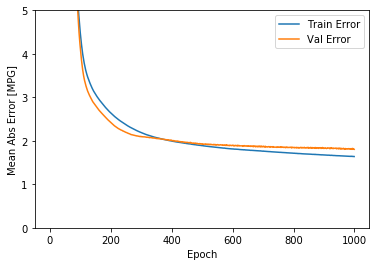

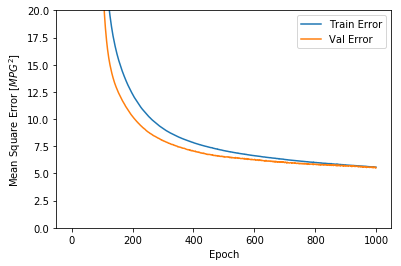

In [163]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.legend()
    plt.ylim([0,5])
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.legend()
    plt.ylim([0,20])

plot_history(history)